## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports import *

In [12]:
# overall imports
import importlib
import data

importlib.reload(data.data_utils)
importlib.reload(data.data_load)
importlib.reload(sim.sim_utils)
importlib.reload(sim)
importlib.reload(models)

import models
import sim.sim 
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run, open_pickled_results


#### Check job specs

In [13]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 29.9%
RAM Usage: 20.5%
Available RAM: 800.2G
Total RAM: 1007.0G
52.4G


In [14]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

XGBoost version: 2.0.3
cupy version: 13.1.0


In [15]:
GPUtil.getAvailable()
# if a number is seen a GPU is available

[0]

In [16]:
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None:
    print('GPU found', DEVICE_ID)
    use_gpu = True

GPU found 0


In [21]:
GPUtil.showUtilization()


| ID | GPU | MEM |
------------------
|  0 |  0% | 83% |


In [18]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

In [19]:
torch.cuda.empty_cache()



#### Simulation tests <a id="sims"></a>

Number of components for 95% variance PCA: 105
X shape: (192, 7380)
X_pca shape: (192, 105)
Y_sc shape: (192, 192)
Y_sc_spectralL shape: (192, 199)
Y_sc_spectralA shape: (192, 200)
Y_fc shape: (192, 192)
Coordinates shape: (192, 3)
Y shape (192, 192)
feature_name:  transcriptome
processing_type:  PCA
[array([[-2.95591791e+00, -3.79608282e+00,  4.66675363e+00, ...,
         3.46940486e-01, -2.35881151e-01, -1.64042492e-01],
       [-1.63934014e+00, -7.19602986e+00,  3.44623414e+00, ...,
        -4.09355895e-03, -7.30753631e-02, -5.93007128e-02],
       [-3.29322768e+00,  1.73461323e+00,  5.27930947e-01, ...,
         5.97679885e-02, -6.55322840e-02, -1.63704169e-01],
       ...,
       [-3.17454420e+00, -4.69892569e+00, -2.25006314e+00, ...,
         9.54330598e-02, -7.15249851e-04,  4.62839404e-01],
       [-8.19925155e+00,  7.87102287e+00, -3.38941959e-01, ...,
        -6.70961910e-01, -3.69039662e-01,  5.61843085e-01],
       [-4.52213508e+00,  1.53777553e+00, -4.49737996e-01, ...,
 

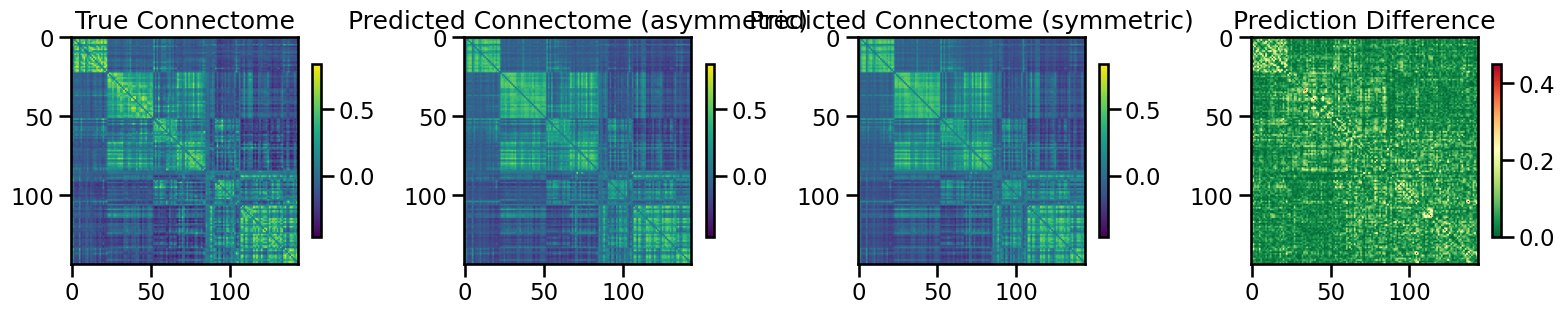

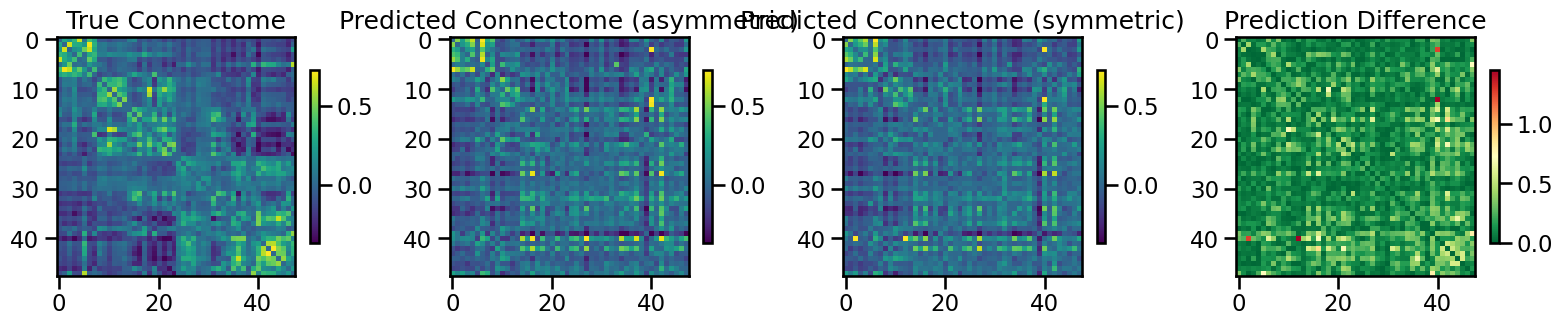


TRAIN METRICS: {'mse': 0.005149905014751551, 'mae': 0.05440073805139448, 'r2': 0.8888852503341433, 'pearson_corr': 0.9439021688454, 'geodesic_distance': 11.636455442480653}
TEST METRICS: {'mse': 0.04750248911046695, 'mae': 0.15423085180531615, 'r2': -0.4748135811701071, 'pearson_corr': 0.22924599232518572, 'geodesic_distance': 13.620209843683437}
BEST VAL SCORE 0.0
BEST MODEL PARAMS {'input_dim': 105, 'encoder_output_dim': 1, 'deep_hidden_dims': [64, 32], 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'weight_decay': 0.0, 'lambda_reg': 0, 'batch_size': 256, 'epochs': 200}


38454

In [33]:
# Run simulation
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='shared_transformer',
              feature_type=[{'transcriptome': 'PCA'}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=True,
              parcellation='S400',
              gene_list='0.2',
              hemisphere='left',
              search_method=('wandb', 'mse', 1),
              save_sim=False,
              track_wandb=True, 
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
import gc
gc.collect()

Number of components for 95% variance PCA: 105
X shape: (192, 7380)
X_pca shape: (192, 105)
Y_sc shape: (192, 192)
Y_sc_spectralL shape: (192, 199)
Y_sc_spectralA shape: (192, 200)
Y_fc shape: (192, 192)
Coordinates shape: (192, 3)
Y shape (192, 192)
feature_name:  transcriptome
processing_type:  PCA
[array([[-2.95591791e+00, -3.79608282e+00,  4.66675363e+00, ...,
         3.46940486e-01, -2.35881151e-01, -1.64042492e-01],
       [-1.63934014e+00, -7.19602986e+00,  3.44623414e+00, ...,
        -4.09355895e-03, -7.30753631e-02, -5.93007128e-02],
       [-3.29322768e+00,  1.73461323e+00,  5.27930947e-01, ...,
         5.97679885e-02, -6.55322840e-02, -1.63704169e-01],
       ...,
       [-3.17454420e+00, -4.69892569e+00, -2.25006314e+00, ...,
         9.54330598e-02, -7.15249851e-04,  4.62839404e-01],
       [-8.19925155e+00,  7.87102287e+00, -3.38941959e-01, ...,
        -6.70961910e-01, -3.69039662e-01,  5.61843085e-01],
       [-4.52213508e+00,  1.53777553e+00, -4.49737996e-01, ...,
 

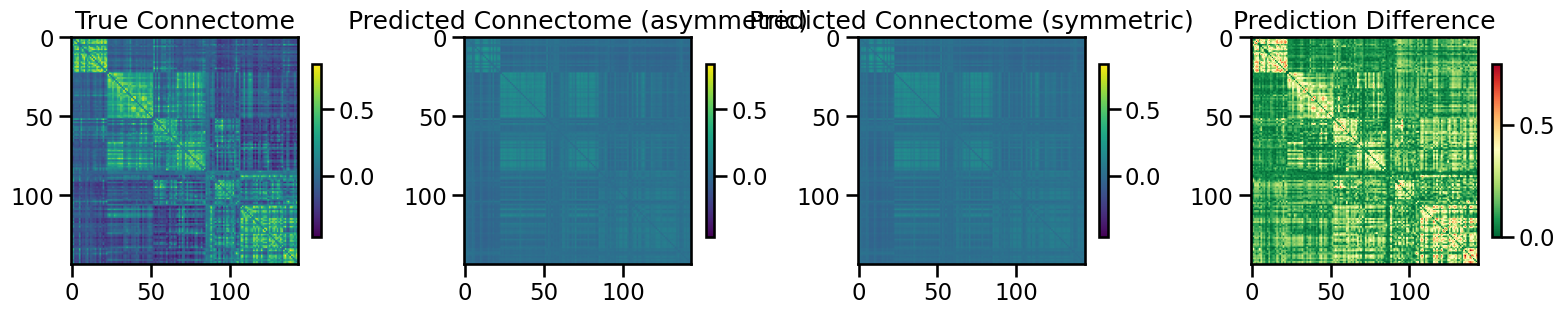

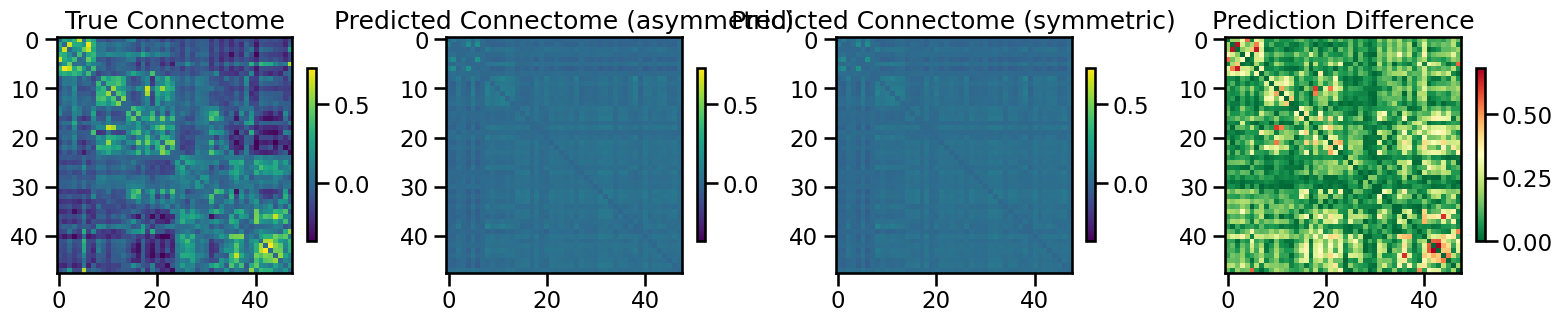


TRAIN METRICS: {'mse': 0.03416952380215775, 'mae': 0.1416234719115999, 'r2': 0.26275570663870684, 'pearson_corr': 0.6971433503446429, 'geodesic_distance': 28.375636825513688}
TEST METRICS: {'mse': 0.029644436467721576, 'mae': 0.1311231941379676, 'r2': 0.07962680845925041, 'pearson_corr': 0.3584740300459761, 'geodesic_distance': 17.06453698978507}
BEST VAL SCORE -0.0438209320923399
BEST MODEL PARAMS {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': 'cuda', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constra

35079

In [29]:
# Run simulation
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='xgboost',
              feature_type=[{'transcriptome': 'PCA'}],
              connectome_target='FC',
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=True,
              parcellation='S400',
              gene_list='0.2',
              hemisphere='left',
              search_method=('bayes', 'mse', 5),
              save_sim=False,
              track_wandb=True, 
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
import gc
gc.collect()